导入

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

生成data

In [2]:
x_data = np.linspace(0,100,500)
y_data = 3.1234*x_data+2.98+np.random.randn(*x_data.shape)*20

画图

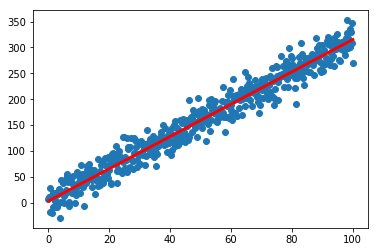

In [3]:
plt.scatter(x_data,y_data)
plt.plot(x_data,3.1234*x_data+2.98,color='red',linewidth=3)

构建模型

In [4]:
x = tf.placeholder(tf.float32,name='x')
y = tf.placeholder(tf.float32,name='y')

w = tf.Variable(1.0,name='w')
b = tf.Variable(0.0,name='b')
pred = w*x+b

Instructions for updating:
Colocations handled automatically by placer.


定义参数

In [5]:
train_epochs = 100
learning_rate = 0.01
display_step = 1000

定义损失函数

In [6]:
loss_function = tf.losses.mean_squared_error(y,pred)

Instructions for updating:
Use tf.cast instead.


定义优化器

In [7]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

Instructions for updating:
Use tf.cast instead.


训练

epoch:02 step:1000 loss:463.2622760067
epoch:04 step:2000 loss:369.1623753254
epoch:06 step:3000 loss:368.8317656218
epoch:08 step:4000 loss:368.5923933196
epoch:10 step:5000 loss:368.4003516981
epoch:12 step:6000 loss:368.2412380946
epoch:14 step:7000 loss:368.1076787440
epoch:16 step:8000 loss:367.9948238278
epoch:18 step:9000 loss:367.8990918431
epoch:20 step:10000 loss:367.8176110106
epoch:22 step:11000 loss:367.7481106039
epoch:24 step:12000 loss:367.6887300297
epoch:26 step:13000 loss:367.6378467000
epoch:28 step:14000 loss:367.5941552100
epoch:30 step:15000 loss:367.5565420485
epoch:32 step:16000 loss:367.5241369320
epoch:34 step:17000 loss:367.4960508057
epoch:36 step:18000 loss:367.4718068888
epoch:38 step:19000 loss:367.4507245135
epoch:40 step:20000 loss:367.4323097141
epoch:42 step:21000 loss:367.4162977833
epoch:44 step:22000 loss:367.4022975575
epoch:46 step:23000 loss:367.3900107673
epoch:48 step:24000 loss:367.3792189371
epoch:50 step:25000 loss:367.3697340062
epoch:52 

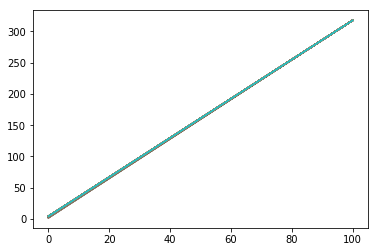

In [8]:
step = 0
loss_sum = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(train_epochs):
        for xs,ys in zip(x_data,y_data):
            _,loss = sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
            step+=1
            loss_sum += loss
            if step % display_step == 0:
                print('epoch:{:02d} step:{:03d} loss:{:.10f}'.format(epoch+1,step,loss_sum/display_step))
                loss_sum = 0
        ws = sess.run(w)
        bs = sess.run(b)
        plt.plot(x_data,ws*x_data+bs)
print('train finished!')

显示w,b

In [9]:
print('w:{} b:{}'.format(ws,bs))

w:3.1361491680145264 b:4.263177394866943


预测

In [10]:
x0 = 3.79
y0 = ws*x0+bs
yy = 3.1234*x0+2.98
print(y0)
print(yy)

16.149182741642
14.817686000000002


保存日志

In [11]:
writer = tf.summary.FileWriter("logs/", tf.get_default_graph())  
writer.close()